In [1]:
# Let's import what we gonna to use firstly.
import nltk
import pandas as pd


from bs4 import BeautifulSoup
import re


# All the imports for the sentimental analysis

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
from wordcloud import WordCloud

sns.set(color_codes=True)

%matplotlib inline

In [2]:
dataset = pd.read_csv("Combined_dataset.csv", sep=',',low_memory=False)
original_data= pd.read_csv("sample.csv", sep=',',low_memory=False)

In [3]:
dataset.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,2975964,R1NBG94582SJE2,B00I01JQJM,860486164,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,N,Y,Five Stars,ok,31/08/15
1,US,23526356,R273DCA6Y0H9V7,B00TCO0ZAA,292641483,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,N,Y,Love it!!!,"Perfect, even sturdier than the original!",31/08/15
2,US,52764145,RQVOXO7WUOFK6,B00B7733E0,75825744,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,N,Y,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",31/08/15
3,US,47348933,R1KWKSF21PO6HO,B006ZN4U34,789352955,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,N,Y,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,31/08/15
4,US,33680700,R38H3UO1J190GI,B00HUEBGMU,19067902,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,N,Y,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,31/08/15


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        2099 non-null   object
 1   customer_id        2099 non-null   int64 
 2   review_id          2099 non-null   object
 3   product_id         2099 non-null   object
 4   product_parent     2099 non-null   int64 
 5   product_title      2099 non-null   object
 6   product_category   2099 non-null   object
 7   star_rating        2099 non-null   int64 
 8   helpful_votes      2099 non-null   int64 
 9   total_votes        2099 non-null   int64 
 10  vine               2099 non-null   object
 11  verified_purchase  2099 non-null   object
 12  review_headline    2099 non-null   object
 13  review_body        2099 non-null   object
 14  review_date        2099 non-null   object
dtypes: int64(5), object(10)
memory usage: 246.1+ KB


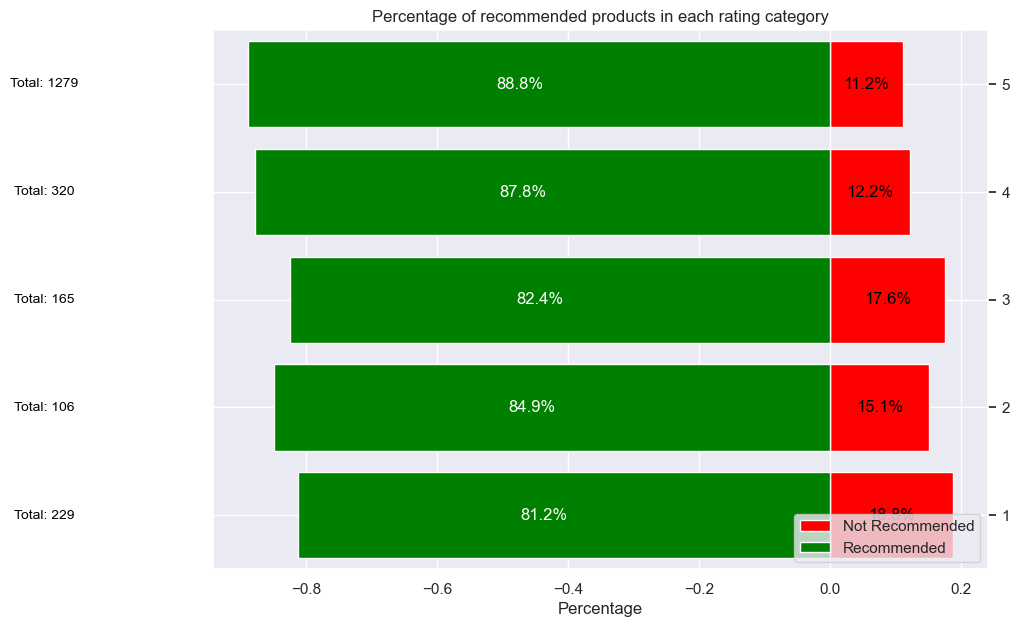

In [5]:
rating_recommended_percentage = dataset.groupby("star_rating")["helpful_votes"].value_counts(normalize=True).unstack().fillna(0)
rating_recommended_percentage['Recommended'] = 1 - rating_recommended_percentage[1]
rating_counts = dataset['star_rating'].value_counts()

rating_counts = rating_counts.sort_index()

# Butterfly chart
fig, ax = plt.subplots(figsize=(10, 7))

for i, (rating, count) in enumerate(rating_counts.items()):
    ax.text(-1.2, i, f'Total: {count}', ha='center', va='center', color='black', fontsize=10)
ax.barh(rating_recommended_percentage.index.astype(str), rating_recommended_percentage[1], color='red', label='Not Recommended')

# Not Recommended
ax.barh(rating_recommended_percentage.index.astype(str), -rating_recommended_percentage['Recommended'], color='green', label='Recommended')

for p in ax.patches:
    width = p.get_width()
    if width != 0:
        label_x = width / 2 if width > 0 else (width / 2) - 0.03  # Adjusted label_x for better alignment
        label_color = 'white' if abs(width) > 0.5 else 'black'
        ax.annotate(f'{abs(width):.1%}', (label_x, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color=label_color)

ax.yaxis.tick_right()
ax.set_yticks(range(len(rating_recommended_percentage)))
ax.set_yticklabels(rating_recommended_percentage.index.astype(str))
ax.legend(loc='lower right')

ax.set_ylim([-0.5, len(rating_recommended_percentage) - 0.5])

plt.title("Percentage of recommended products in each rating category")
plt.xlabel("Percentage")
plt.show()

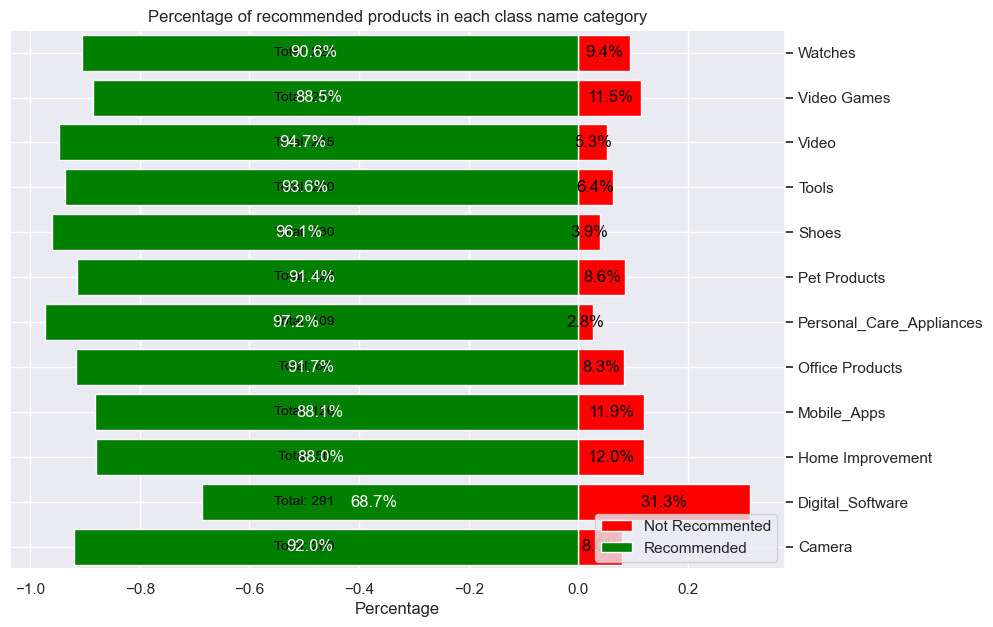

In [6]:
class_name_recommended_percentage = dataset.groupby("product_category")["star_rating"].value_counts(normalize=True).unstack().fillna(0)
class_name_recommended_percentage['Not Recommended'] = 1 - class_name_recommended_percentage[1]
class_name_counts = dataset['product_category'].value_counts()

class_name_counts = class_name_counts.sort_index()

# Butterfly chart
fig, ax = plt.subplots(figsize=(10, 7))

for i, (class_name, count) in enumerate(class_name_counts.items()):
    ax.text(-0.5, i, f'Total: {count}', ha='center', va='center', color='black', fontsize=10)

# Recommended
ax.barh(class_name_recommended_percentage.index.astype(str), class_name_recommended_percentage[1], color='red', label='Not Recommented')

# Not Recommended
ax.barh(class_name_recommended_percentage.index.astype(str), -class_name_recommended_percentage['Not Recommended'], color='green', label='Recommended')

for p in ax.patches:
    width = p.get_width()
    if width != 0:
        label_x = width / 2 if width > 0 else (width / 2) - 0.03  # Adjusted label_x for better alignment
        label_color = 'white' if abs(width) > 0.5 else 'black'
        ax.annotate(f'{abs(width):.1%}', (label_x, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color=label_color)

ax.yaxis.tick_right()
ax.set_yticks(range(len(class_name_recommended_percentage)))
ax.set_yticklabels(class_name_recommended_percentage.index.astype(str))
ax.legend(loc='lower right')

# Set ylim for better alignment
ax.set_ylim([-0.5, len(class_name_recommended_percentage) - 0.5])

plt.title("Percentage of recommended products in each class name category")
plt.xlabel("Percentage")
plt.show()